# OrthoSAM examples - using the Ravi2 Orthomosaic


In [2]:
import json
import os
import sys
from utility import load_config,create_dir_ifnotexist, prompt_fid,load_image, plot_tiling_with_overlap

**This example creates two crops of the `Ravi2_orthomosaic_02mm_crop.png` that can be downloaded from: https://doi.org/10.5281/zenodo.16567549**

We are using [ImageMagick](https://imagemagick.org/) to create the crops (but any other software will work as well):
```bash
magick Ravi2_orthomosaic_02mm.png -crop 2048x2048+10000+10000 Ravi2_orthomosaic_02mm_crop.png
magick Ravi2_orthomosaic_02mm.png -crop 2048x2048+16000+16000 Ravi2_orthomosaic_02mm_crop2.png
```

and place them into `data/Ravi`.

In the first step, we set parameters and create the list of files. If you set `id=None`, all files in the directory listed in 'DatasetName' will be processed. *We are processing the images one by one and will start with id=1 (because Ravi2_orthomosaic_02mm_crop.png is id=0).*

In [7]:
id=1 # Filename or the index after sorting by file name. If not known input None and all files will be listed with the index.
# For this example, we only work with the first image (id=0).

#main_para defines the parameters for the first layer
#it also serves as a template for the later layers.
main_para={'OutDIR': f'Ravi/Ravi_{id}_up5_org',# where output will be stored relative to the MainOutDIR stored in config.json
    'DatasetName': 'Ravi/',#where image is stored
    'fid': id, #Filename or the index after sorting by file name. If index is not known use None and all files will be listed with the index.
    'resolution(mm)': 0.2, #image resolution in mm/pixel
    'tile_size': 1024,
    'tile_overlap':200,
    'resample_factor': 1, #'Auto': auto select resample rate.
    'input_point_per_axis': 30,
    'dilation_size':5,
    'stability_t':0.85,
    'expected_min_size(sqmm)': 50,
    'min_radius': 0,
    'Calculate_stats': True, # True: calculate statistics. 
    'Discord_notification': False,# True: send discord when finished. If you wish to use this feature, please create a file name DWH.txt in the code directory and set the webhook.
    'Plotting': True# True: plot the results
    }

#para_list defines the parameters for the later layers
#each dictionary corresponds to one layer.
# The first layer is defined in main_para.
#the second layer is defined in para_list[0] and so on.
#main_para serves as a template for the later layers.
#and in para_list specify the parameters for each layer that need to be updated.
# para_list = []
para_list=[
    {'resample_factor':1/5, #Because of the high resolution of the image, we are upsampling with factor 1/5
    }
    ]

#parameters for preprocessing. Only create this list if you want to use preprocessing.
#preprocessing is optional.
pre_para_list=[{#'Gaussian': {'kernel size':3},
                #'CLAHE':{'clip limit':2},
                #'Resample': {'fxy':4},
                #'Buffering': {'crop size': crop_size}
            },{},{}]

You can verify the parameters by looking at the dictonaries

In [8]:
main_para

{'OutDIR': 'Ravi/Ravi_1_up5_org',
 'DatasetName': 'Ravi/',
 'fid': 1,
 'resolution(mm)': 0.2,
 'tile_size': 1024,
 'tile_overlap': 200,
 'resample_factor': 1,
 'input_point_per_axis': 30,
 'dilation_size': 5,
 'stability_t': 0.85,
 'expected_min_size(sqmm)': 50,
 'min_radius': 0,
 'Calculate_stats': True,
 'Discord_notification': False,
 'Plotting': True}

In [9]:
main_para['1st_resample_factor'] = main_para['resample_factor']
config = load_config()
main_para={**config,**main_para}
main_para['OutDIR'] = os.path.join(main_para.get('MainOutDIR'), main_para.get('OutDIR'))
if not os.path.exists(os.path.join(main_para.get('DataDIR'), main_para.get('DatasetName'))):
    print('Input directory does not exist. Exiting script.')
    sys.exit()

OutDIR=main_para.get('OutDIR')
create_dir_ifnotexist(OutDIR)
# if main_para.get('fid')==None:
#     main_para=prompt_fid(main_para)

/home/bodo/OrthoSAM/data/Ravi/Ravi2_orthomosaic_02mm_crop.png imported


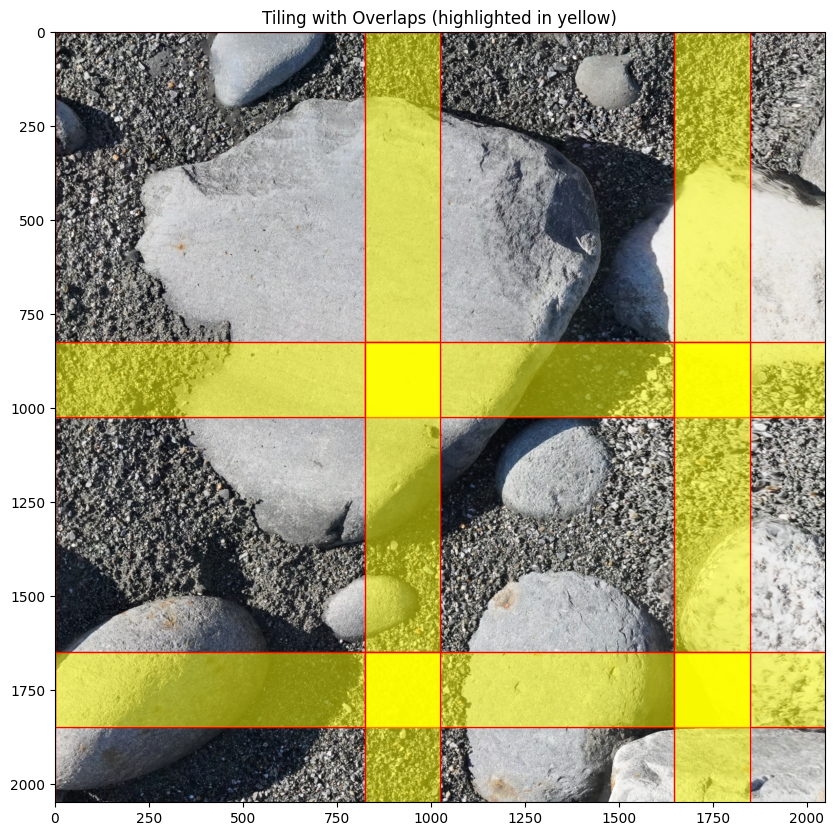

In [10]:
import matplotlib.pyplot as plt
DataDIR = main_para.get('DataDIR')
DSname = main_para.get('DatasetName')
fid = main_para.get('fid')
crop_size = main_para.get('tile_size')
overlap = main_para.get('tile_overlap')
image=load_image(DataDIR,DSname,fid)

plt.figure(figsize=(15,10))
plot_tiling_with_overlap(image, (crop_size,crop_size), overlap)

In [50]:
# Save init_para to a JSON file
para_list.insert(0, {})
pass_para_list = [dict(main_para, **para) for para in para_list]
with open(OutDIR+f'init_para.json', 'w') as json_file:
    json.dump(pass_para_list, json_file, indent=4)
with open(OutDIR+f'pre_para.json', 'w') as json_file:
    json.dump(pre_para_list, json_file, indent=4)

2025-08-17 19:02:31,998 - INFO - ---------------
2025-08-17 19:02:32,000 - INFO - Layer 0
2025-08-17 19:02:32,001 - INFO - 	Segment tiles
2025-08-17 19:02:32,002 - INFO - 	Loaded parameters from json
2025-08-17 19:02:32,004 - INFO - {'MODEL_TYPE': 'vit_h', 'CheckpointDIR': '/home/bodo/OrthoSAM/MetaSAM', 'DataDIR': '/home/bodo/OrthoSAM/data', 'BaseDIR': '/home/bodo/OrthoSAM', 'MainOutDIR': '/home/bodo/OrthoSAM/output', 'OutDIR': '/home/bodo/OrthoSAM/output/Ravi/Ravi_1_up5_org', 'DatasetName': 'Ravi/', 'fid': 1, 'resolution(mm)': 0.2, 'tile_size': 1024, 'tile_overlap': 200, 'resample_factor': 1, 'input_point_per_axis': 30, 'dilation_size': 5, 'stability_t': 0.85, 'expected_min_size(sqmm)': 50, 'min_radius': 0, 'Calculate_stats': True, 'Discord_notification': False, 'Plotting': True, '1st_resample_factor': 1}
2025-08-17 19:02:32,004 - INFO - 	Minimum expected size: 1249.9999999999998 pixel
2025-08-17 19:02:32,005 - INFO - 	No pre_para found. Only applying resampling.
2025-08-17 19:02:32,0

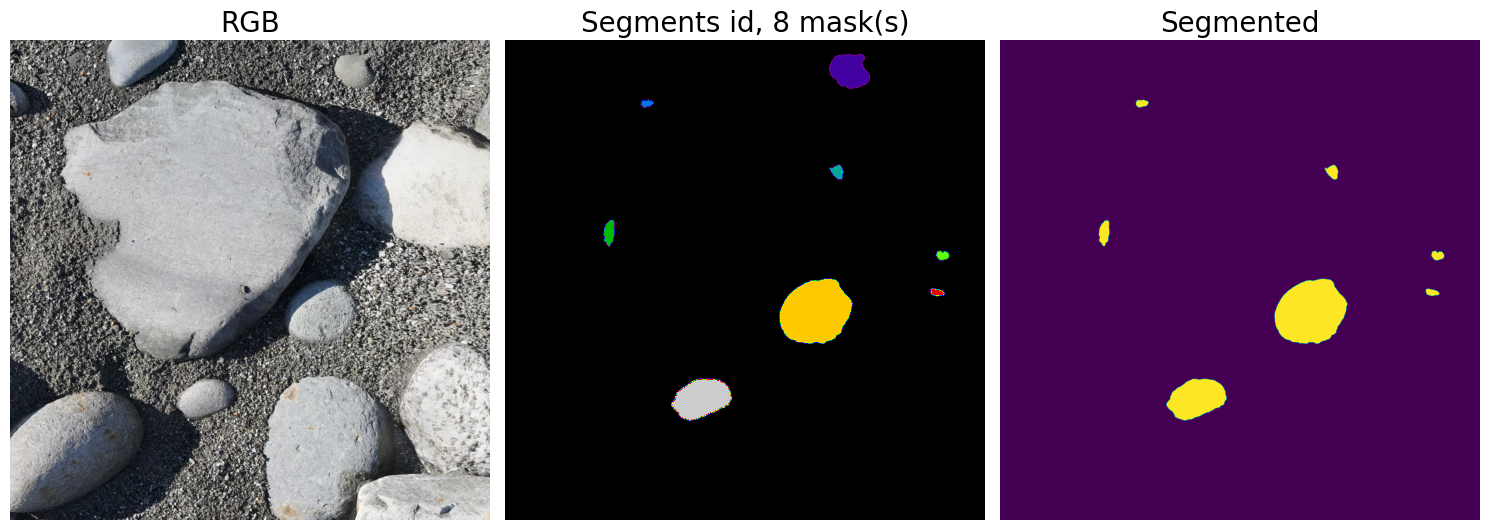

2025-08-17 19:05:48,483 - INFO - 	script took: 1.70 seconds
2025-08-17 19:05:48,483 - INFO - 	Merging completed.
2025-08-17 19:05:48,484 - INFO - ---------------
2025-08-17 19:05:48,484 - INFO - ---------------
2025-08-17 19:05:48,484 - INFO - Layer 1
2025-08-17 19:05:48,484 - INFO - 	Loaded parameters from /home/bodo/OrthoSAM/output/Ravi/Ravi_1_up5_org
2025-08-17 19:05:48,485 - INFO - {'MODEL_TYPE': 'vit_h', 'CheckpointDIR': '/home/bodo/OrthoSAM/MetaSAM', 'DataDIR': '/home/bodo/OrthoSAM/data', 'BaseDIR': '/home/bodo/OrthoSAM', 'MainOutDIR': '/home/bodo/OrthoSAM/output', 'OutDIR': '/home/bodo/OrthoSAM/output/Ravi/Ravi_1_up5_org', 'DatasetName': 'Ravi/', 'fid': 1, 'resolution(mm)': 0.2, 'tile_size': 1024, 'tile_overlap': 200, 'resample_factor': 0.2, 'input_point_per_axis': 30, 'dilation_size': 5, 'stability_t': 0.85, 'expected_min_size(sqmm)': 50, 'min_radius': 0, 'Calculate_stats': True, 'Discord_notification': False, 'Plotting': True, '1st_resample_factor': 1}
2025-08-17 19:05:48,485 

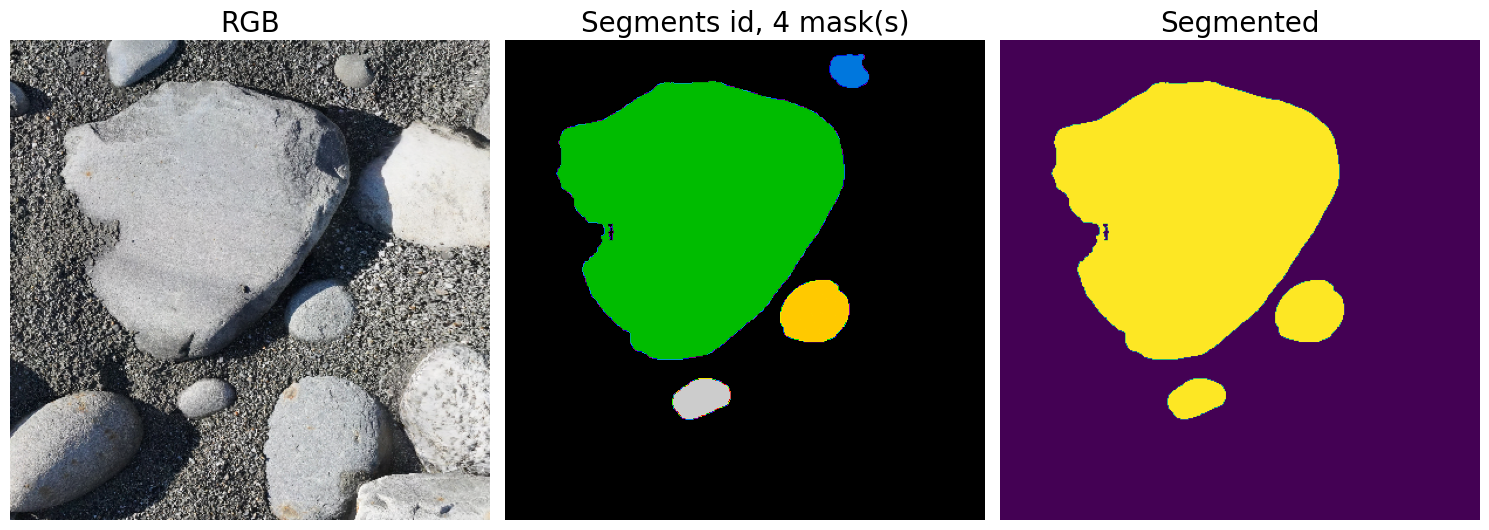

2025-08-17 19:06:05,649 - INFO - 	script took: 0.66 seconds
2025-08-17 19:06:05,650 - INFO - 	Merging completed.
2025-08-17 19:06:05,650 - INFO - ---------------
2025-08-17 19:06:05,738 - INFO - 
2025-08-17 19:06:05,739 - INFO -   0%|          | 0/5 [00:00<?, ?id/s]
2025-08-17 19:06:05,739 - INFO - 
2025-08-17 19:06:05,740 - INFO - 100%|##########| 5/5 [00:00<00:00, 62415.24id/s]
2025-08-17 19:06:05,758 - INFO - 	Layer 001 discovered 2 new mask(s)
2025-08-17 19:06:05,891 - ERROR - 
2025-08-17 19:06:05,892 - ERROR -   0%|          | 0/7 [00:00<?, ?it/s]
2025-08-17 19:06:05,917 - ERROR - 
2025-08-17 19:06:05,918 - ERROR - 100%|##########| 7/7 [00:00<00:00, 297.38it/s]


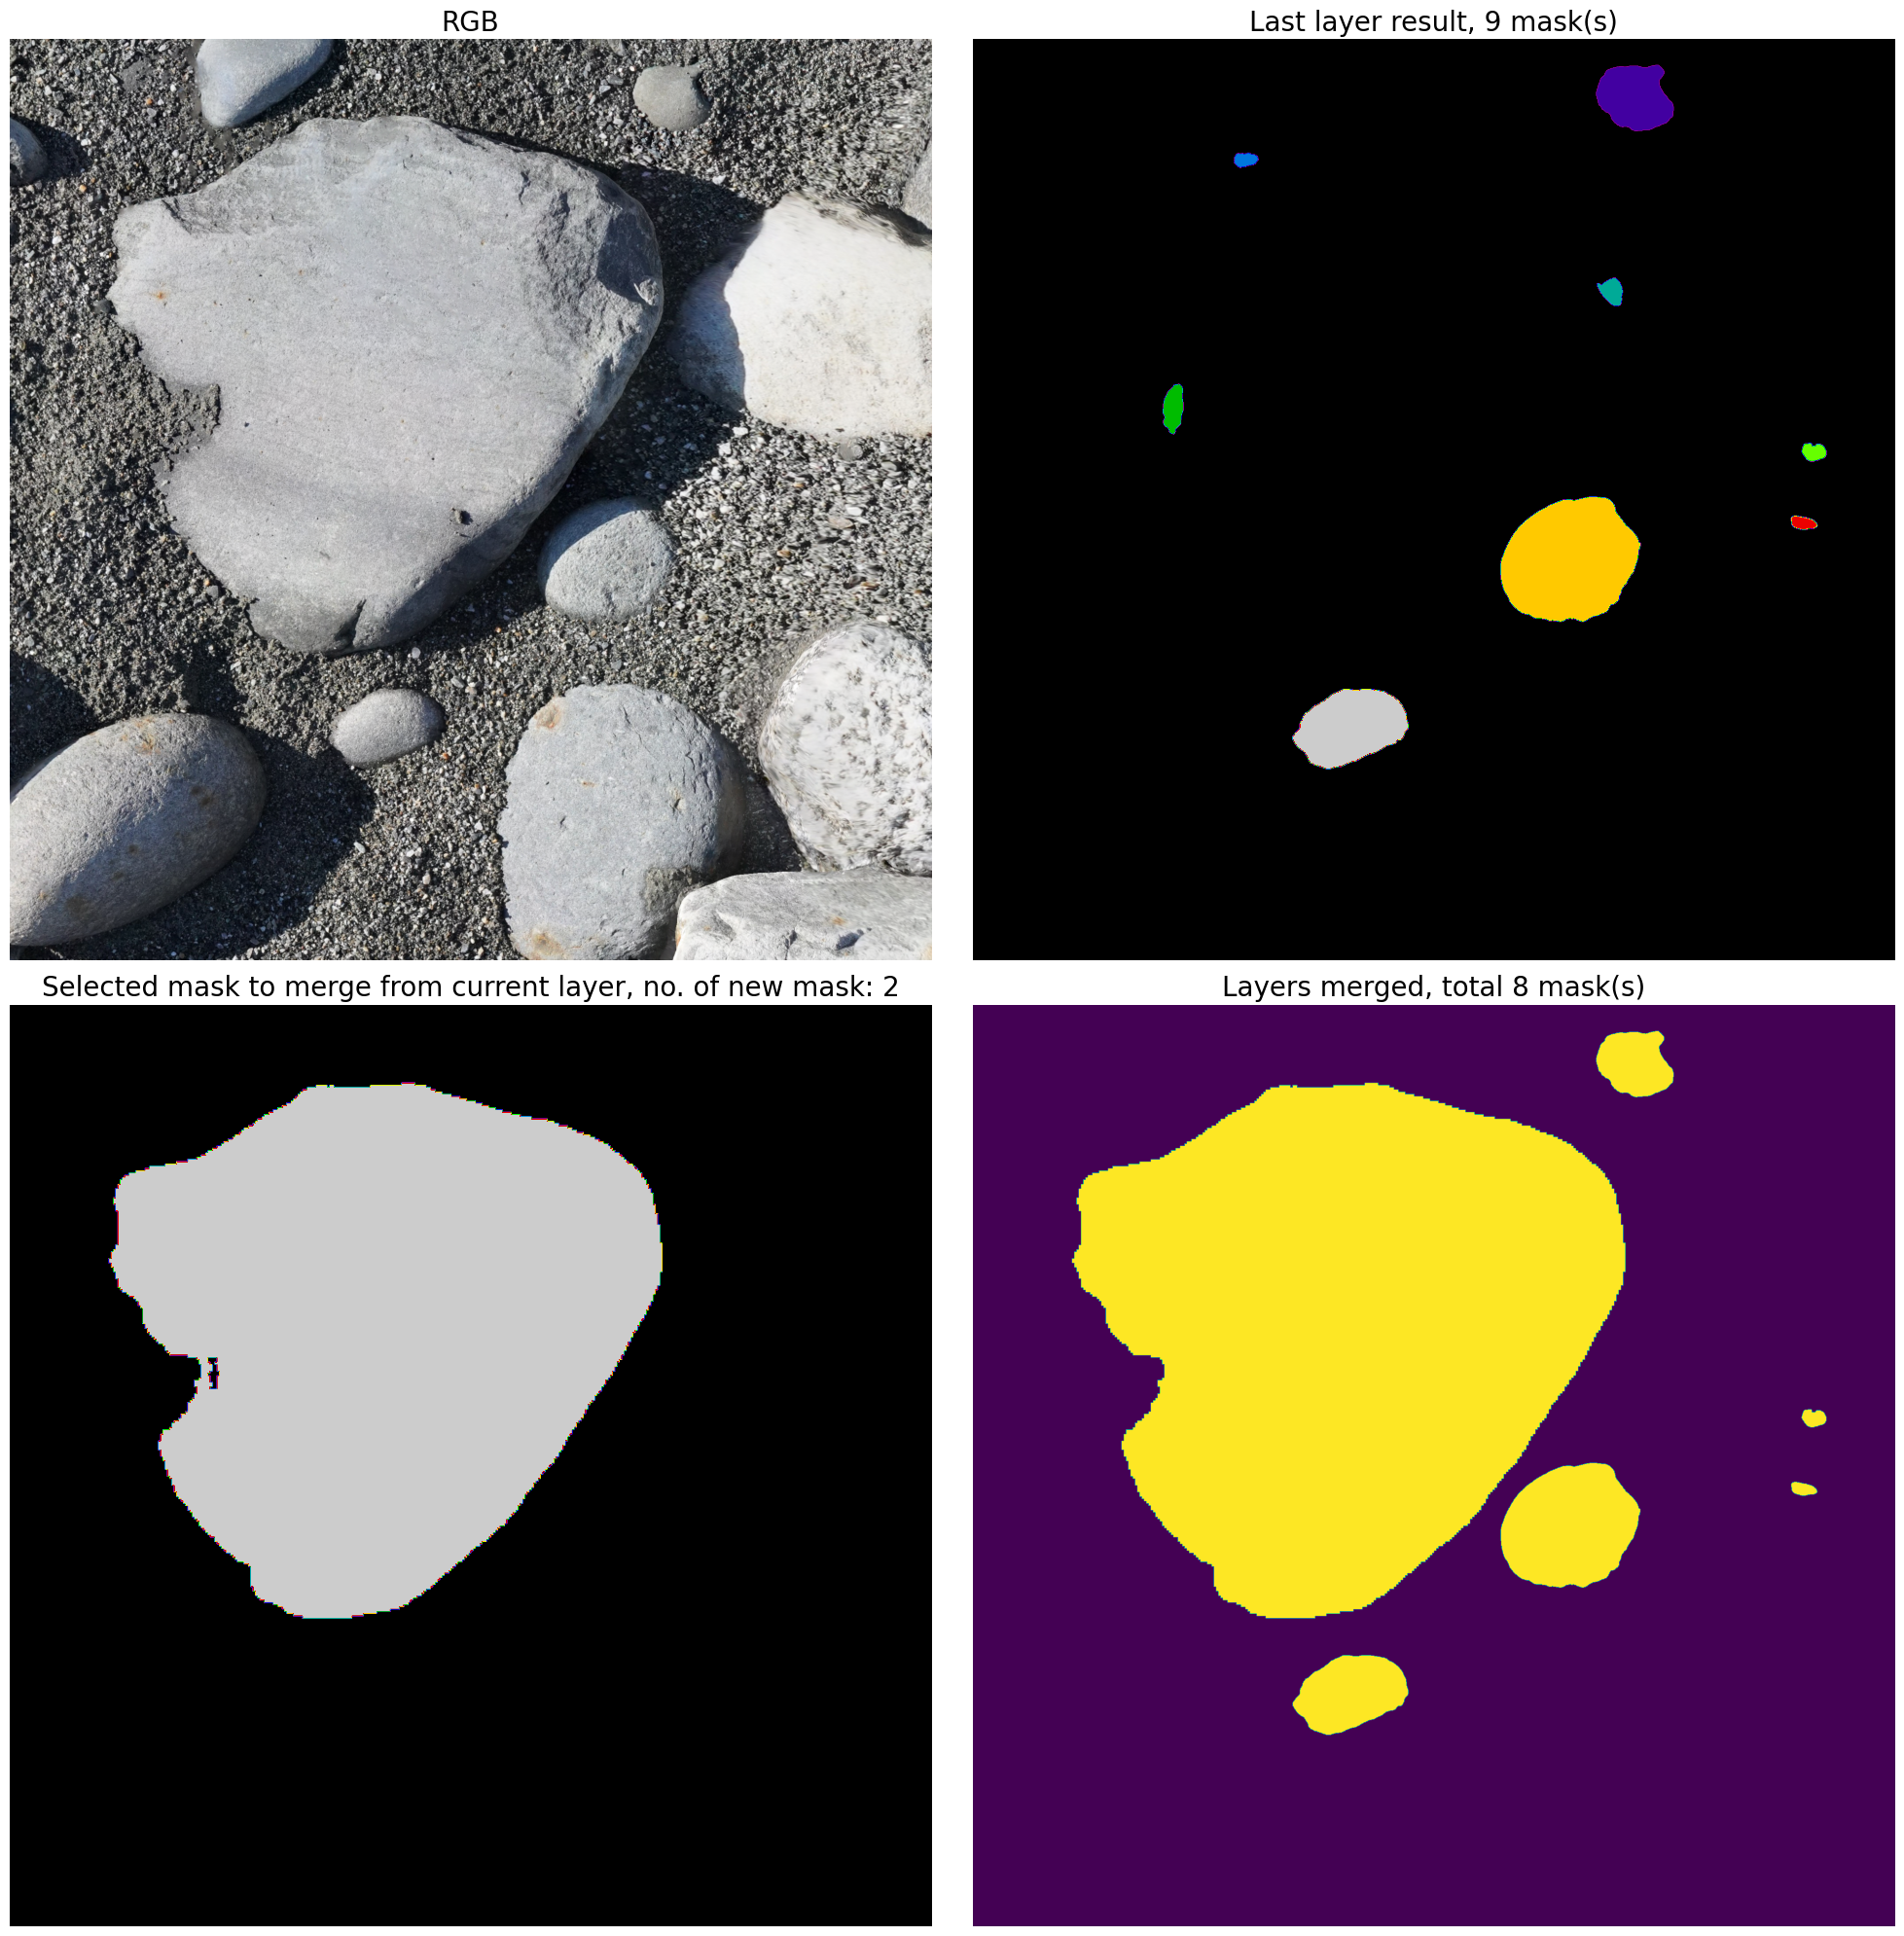

2025-08-17 19:06:09,331 - INFO - 	Saving id mask to /home/bodo/OrthoSAM/output/Ravi/Ravi_1_up5_org/Merged/Merged_Layers_001.npy...
2025-08-17 19:06:09,344 - INFO - 	Saved
2025-08-17 19:06:09,345 - INFO - 	script took: 20.86 seconds
2025-08-17 19:06:09,345 - INFO - 	Output saved to /home/bodo/OrthoSAM/output/Ravi/Ravi_1_up5_org
2025-08-17 19:06:09,345 - INFO - ---------------
2025-08-17 19:06:09,346 - INFO - Run took: 3.62 minutes
2025-08-17 19:06:09,346 - INFO - Calculating statistics...
2025-08-17 19:06:09,508 - INFO - /home/bodo/OrthoSAM/data/Ravi/Ravi2_orthomosaic_02mm_crop.png imported
2025-08-17 19:06:09,517 - INFO - /home/bodo/OrthoSAM/output/Ravi/Ravi_1_up5_org/Merged/Merged_Layers_001.npy imported
2025-08-17 19:06:09,851 - INFO - Statistics saved to props.csv


In [51]:
from OrthoSAM import orthosam
orthosam(pass_para_list)

# Verify results and plot

Here we do some first-oder analysis of the output statistic data.

In [11]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

merged_results = pd.read_csv('/home/bodo/OrthoSAM/output/Ravi/Ravi_1_up5_org/props.csv')

In [53]:
merged_results.head()

label   centroid-0   centroid-1  axis_major_length  axis_minor_length  \
0      1   131.372163  1469.531841          34.632904          28.763304   
1      2   719.066141   826.961877         246.033956         219.648020   
2      3   818.341463   452.243902          16.131431           4.129115   
3      4   919.138361  1866.879454          11.305537           7.799327   
4      5  1160.193669  1324.423035          63.176289          52.623136   

       area    perimeter        IR         h       IRt       IRn      mean_R  \
0    761.28   112.160216  0.760460  0.008572  0.987190  0.770328  155.019441   
1  40797.44  1023.358196  0.489539  0.003210  0.995191  0.491905  169.741858   
2     41.00    43.911270  0.267203  0.350936  0.546450  0.488981  112.208780   
3     67.36    33.224978  0.766801  0.033681  0.950215  0.806976  154.572447   
4   2601.96   197.863579  0.835177  0.008305  0.987587  0.845675  142.186705   

       mean_G      mean_B  median_R  median_G  median_B  
0  155.429802  151.621427     168.0     168.0     163.0  
1  171.029000  173.704879     184.0     185.0     187.0  
2  110.153171  107.937561     123.0     120.0     116.0  
3  152.550475  147.758907     154.0     152.0     146.0  
4  147.865440  152.399099     164.0     167.0     167.0

In [54]:
len(merged_results)

7

In [55]:
merged_results.describe()

label   centroid-0   centroid-1  axis_major_length  \
count  7.000000     7.000000     7.000000           7.000000   
mean   4.000000   907.798009  1231.613308          62.114452   
std    2.160247   433.151200   542.929630          83.563096   
min    1.000000   131.372163   452.243902          11.305537   
25%    2.500000   768.703802   832.565634          14.101603   
50%    4.000000   919.138361  1324.423035          34.632904   
75%    5.500000  1118.421470  1656.307747          57.312781   
max    7.000000  1529.824991  1866.879454         246.033956   

       axis_minor_length          area    perimeter        IR         h  \
count           7.000000      7.000000     7.000000  7.000000  7.000000   
mean           50.054549   6513.691429   226.370165  0.658574  0.084813   
std            76.838036  15146.052101   357.053751  0.204843  0.125805   
min             4.129115     41.000000    30.230866  0.267203  0.003210   
25%             6.706824     59.740000    38.568124  0.603100  0.008439   
50%            28.763304    761.280000   112.160216  0.760460  0.033681   
75%            42.213878   1938.320000   170.852814  0.770488  0.094493   
max           219.648020  40797.440000  1023.358196  0.835177  0.350936   

            IRt       IRn      mean_R      mean_G      mean_B    median_R  \
count  7.000000  7.000000    7.000000    7.000000    7.000000    7.000000   
mean   0.885193  0.732881  151.301503  150.729550  149.160144  162.857143   
std    0.162553  0.169280   21.500511   20.566937   20.403379   22.033524   
min    0.546450  0.488981  112.208780  110.153171  107.937561  123.000000   
25%    0.864860  0.631117  144.235647  147.250023  148.002622  155.500000   
50%    0.950215  0.806976  154.572447  152.550475  151.621427  164.000000   
75%    0.987389  0.844279  162.380650  163.229401  157.425950  176.000000   
max    0.995191  0.883417  179.096700  171.444359  173.704879  190.000000   

         median_G    median_B  
count    7.000000    7.000000  
mean   161.571429  158.571429  
std     21.900207   22.648452  
min    120.000000  116.000000  
25%    154.500000  152.000000  
50%    167.000000  163.000000  
75%    175.000000  170.000000  
max    185.000000  187.000000

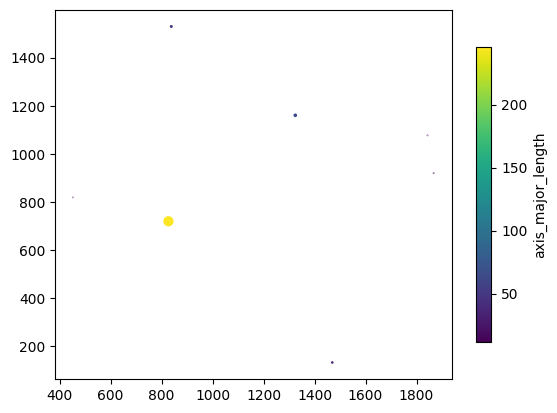

In [56]:
plt.scatter(merged_results['centroid-1'], merged_results['centroid-0'], c=merged_results['axis_major_length'], s=merged_results['area']/1000, cmap='viridis')
h = plt.colorbar(shrink=0.8)
h.set_label('axis_major_length')

## Loading labeled images

In [57]:
merged_img = np.load('/home/bodo/OrthoSAM/output/Ravi/Ravi_1_up5_org/Merged/Merged_Layers_001.npy')

In [58]:
merged_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(2048, 2048))

In [59]:
#convert to float and then set background to nan
merged_img = merged_img.astype(np.float32)

In [60]:
merged_img[merged_img == 0.0] = np.nan

In [61]:
len(np.unique(merged_img[~np.isnan(merged_img)]))

7

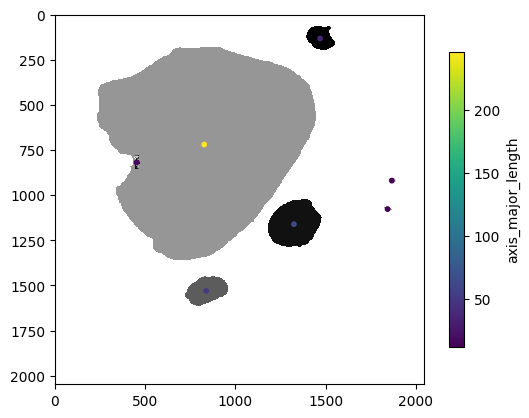

In [62]:
vals = np.linspace(0,1,256)
np.random.shuffle(vals)
cmap = plt.cm.colors.ListedColormap(plt.cm.gray(vals))
plt.imshow(merged_img, cmap=cmap)

plt.scatter(merged_results['centroid-1'], merged_results['centroid-0'], c=merged_results['axis_major_length'], s=10, cmap='viridis')
h = plt.colorbar(shrink=0.8)
h.set_label('axis_major_length')